In [ ]:


# DATASET SOURCE :    https://www.kaggle.com/datatattle/covid-19-nlp-text-classification

from google.colab import files 
files.upload() 

#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:

import pandas as pd
import os 


df_train = pd.read_csv('Corona_NLP_train.csv',encoding = "ISO-8859-1")
df_test = pd.read_csv('Corona_NLP_test.csv',encoding = "ISO-8859-1")

frames = [df_train,df_test] 

result = pd.concat(frames)

In [ ]:
dataframe = result[['OriginalTweet',  'Sentiment']]
# sample to 5000 
#dataframe = dataframe.sample(n=5000) 
#dataframe.shape[0]

In [ ]:
# one hot encoding the sentiment label
sentiment = pd.get_dummies(dataframe.Sentiment)
dataframe_one = pd.concat([dataframe, sentiment], axis=1)
dataframe_one = dataframe_one.drop(columns='Sentiment')



#text cleaning tweets 
dataframe_one['CleanedTweet'] = dataframe['OriginalTweet']

#lower text 
dataframe_one['CleanedTweet'] = dataframe_one['CleanedTweet'].str.lower()






# remove punctuation 
#dataframe_one['CleanedTweet'] = dataframe_one['CleanedTweet'].str.replace('[^\w\s]','')

# remove stopwords 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
dataframe_one['CleanedTweet'] = dataframe_one['CleanedTweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#stemming 
from nltk.stem import PorterStemmer 
ps = PorterStemmer() 



#dataframe_one.to_csv('test.csv')
#files.download('test.csv')


#remove link and only take alpha numeric value 
import re 
pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
for i, row in dataframe_one.iterrows():
    textNow = row.CleanedTweet
    textCleaned = pattern.sub('', str(textNow) )
    textCleaned = re.sub('[^0-9a-zA-Z]+', ' ', textCleaned)

    #PorterStemmer
    stemmedSentence  = ""
    for word in textCleaned.split(" "):
      stemmedSentence = stemmedSentence + ps.stem(word) + " "

    # Remove Number 
    stemmedSentence = re.sub(r"\d+", "", stemmedSentence)
    dataframe_one.at[i,'CleanedTweet'] =  stemmedSentence


    




NameError: ignored

In [ ]:
#divide between original tweets as attribute and sentiment as a label 
tweets = dataframe_one['CleanedTweet'].values 
sentiments = dataframe_one[['Extremely Negative' , 'Extremely Positive' , 'Negative' , 'Neutral', 'Positive']]

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split 
attribute_train , attribute_test , label_train , label_test = train_test_split(tweets,sentiment,test_size = 0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=100000, oov_token='-')
tokenizer.fit_on_texts(attribute_train) 
tokenizer.fit_on_texts(attribute_test)
 
sequence_train = tokenizer.texts_to_sequences(attribute_train)
sequence_test = tokenizer.texts_to_sequences(attribute_test)
 
pad_train = pad_sequences(sequence_train) 
pad_test = pad_sequences(sequence_test)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=100000, output_dim=16),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128 , dropout=0.5)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(pad_train, label_train, epochs=10, batch_size=32, 
                    validation_data=(pad_test, label_test), verbose=2)

Epoch 1/10
1124/1124 - 114s - loss: 1.4339 - accuracy: 0.3611 - val_loss: 1.1804 - val_accuracy: 0.5220
Epoch 2/10
1124/1124 - 113s - loss: 1.0953 - accuracy: 0.5658 - val_loss: 1.0004 - val_accuracy: 0.6186
Epoch 3/10
1124/1124 - 113s - loss: 0.9368 - accuracy: 0.6505 - val_loss: 0.9706 - val_accuracy: 0.6357
Epoch 4/10
1124/1124 - 114s - loss: 0.8607 - accuracy: 0.6857 - val_loss: 0.9759 - val_accuracy: 0.6476
Epoch 5/10
1124/1124 - 115s - loss: 0.7990 - accuracy: 0.7139 - val_loss: 0.9854 - val_accuracy: 0.6493
Epoch 6/10
1124/1124 - 114s - loss: 0.7537 - accuracy: 0.7326 - val_loss: 1.0020 - val_accuracy: 0.6356
Epoch 7/10
1124/1124 - 114s - loss: 0.7127 - accuracy: 0.7479 - val_loss: 1.0245 - val_accuracy: 0.6416
Epoch 8/10
1124/1124 - 114s - loss: 0.6858 - accuracy: 0.7606 - val_loss: 1.0355 - val_accuracy: 0.6415
Epoch 9/10
1124/1124 - 115s - loss: 0.6557 - accuracy: 0.7702 - val_loss: 1.0441 - val_accuracy: 0.6443
Epoch 10/10
1124/1124 - 115s - loss: 0.6299 - accuracy: 0.7803 -

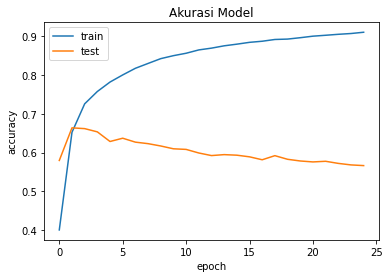

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

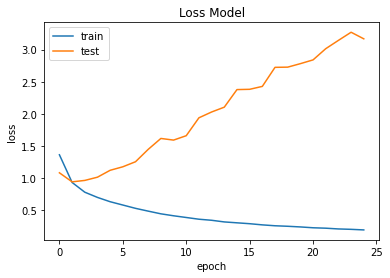

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()